In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library. 
import requests

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorland
Processing Record 2 of Set 1 | chitral
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | aksarka
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | namatanai
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | biala podlaska
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kutum
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | znamenskoye
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sola
Processing Record 22 of Set 1 | lagoa
Processing Record 23 of S

Processing Record 33 of Set 4 | khatanga
Processing Record 34 of Set 4 | geraldton
Processing Record 35 of Set 4 | bereda
Processing Record 36 of Set 4 | tsienyane
City not found. Skipping...
Processing Record 37 of Set 4 | amapa
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | yevlax
Processing Record 40 of Set 4 | meadow lake
Processing Record 41 of Set 4 | socorro
Processing Record 42 of Set 4 | moberly
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | jeremoabo
Processing Record 45 of Set 4 | khandyga
Processing Record 46 of Set 4 | mbuji-mayi
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | mahibadhoo
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | labutta
City not found. Skipping...
Processing Record 3 of Set 5 | bad hofgastein
Processing Record 4 of Set 5 | klobuck
Processing Record 5 of Set 5 

Processing Record 20 of Set 8 | imeni poliny osipenko
Processing Record 21 of Set 8 | jashpurnagar
Processing Record 22 of Set 8 | vysokogornyy
Processing Record 23 of Set 8 | morshansk
Processing Record 24 of Set 8 | general roca
Processing Record 25 of Set 8 | port macquarie
Processing Record 26 of Set 8 | cairns
Processing Record 27 of Set 8 | lavrentiya
Processing Record 28 of Set 8 | tiznit
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | galle
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | bhalki
Processing Record 34 of Set 8 | chifeng
Processing Record 35 of Set 8 | verkhoyansk
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | kokopo
Processing Record 38 of Set 8 | mabaruma
Processing Record 39 of Set 8 | illela
Processing Record 40 of Set 8 | williamsport
Processing Record 41 of Set 8 | stornoway
Processing Record 42 of Set 8 | tabialan
City not found. Skippi

Processing Record 4 of Set 12 | rio gallegos
Processing Record 5 of Set 12 | lamar
Processing Record 6 of Set 12 | addi ugri
City not found. Skipping...
Processing Record 7 of Set 12 | burnie
Processing Record 8 of Set 12 | bonavista
Processing Record 9 of Set 12 | jega
Processing Record 10 of Set 12 | laguna
Processing Record 11 of Set 12 | saint-pierre
Processing Record 12 of Set 12 | margate
Processing Record 13 of Set 12 | camacha
Processing Record 14 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 15 of Set 12 | takaungu
Processing Record 16 of Set 12 | boyuibe
Processing Record 17 of Set 12 | ostrovtsy
Processing Record 18 of Set 12 | huarmey
Processing Record 19 of Set 12 | sobolevo
Processing Record 20 of Set 12 | rantoul
Processing Record 21 of Set 12 | birjand
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | bulawayo
Processing Record 24 of Set 12 | coolum beach
Processing Record 25 of Set 12 | morro da fumaca
Processing 

In [18]:
# Print the city count to confirm sufficient count.
len(city_data)

565

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorland,67.6670,12.6934,33.66,58,89,21.50,NO,2022-05-08 00:01:12
1,Chitral,35.8462,71.7858,63.93,40,0,7.20,PK,2022-05-08 00:01:13
2,Bluff,-46.6000,168.3333,58.80,95,100,6.44,NZ,2022-05-07 23:56:27
3,Ushuaia,-54.8000,-68.3000,47.86,49,20,18.41,AR,2022-05-07 23:54:28
4,Hobart,-42.8794,147.3294,56.26,76,40,6.91,AU,2022-05-07 23:55:05
5,Aksarka,66.5606,67.7975,29.21,98,84,9.17,RU,2022-05-08 00:01:15
6,Bredasdorp,-34.5322,20.0403,53.56,92,29,2.75,ZA,2022-05-07 23:54:56
7,Namatanai,-3.6667,152.4333,84.06,73,46,10.56,PG,2022-05-07 23:59:13
8,Provideniya,64.3833,-173.3000,33.67,88,99,7.85,RU,2022-05-08 00:01:16
9,Mataura,-46.1927,168.8643,58.48,98,100,0.18,NZ,2022-05-07 23:54:53


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

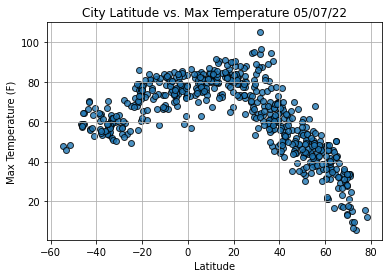

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

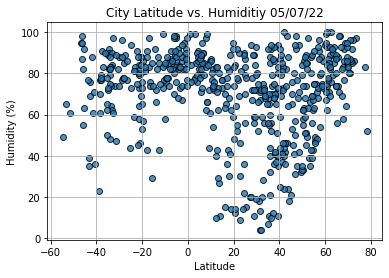

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humiditiy "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

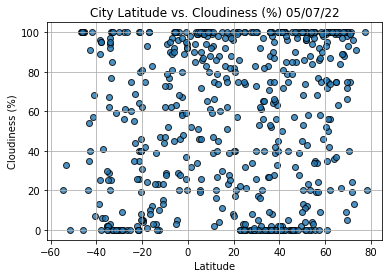

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

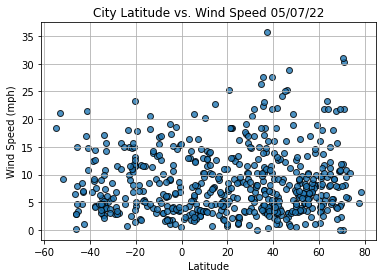

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-05-08 00:01:18
Lat                        -33.65
Lng                      115.3333
Max Temp                    61.11
Humidity                       64
Cloudiness                     77
Wind Speed                    4.7
Name: 13, dtype: object

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sorland,NO,2022-05-08 00:01:12,67.6670,12.6934,33.66,58,89,21.50
1,Chitral,PK,2022-05-08 00:01:13,35.8462,71.7858,63.93,40,0,7.20
5,Aksarka,RU,2022-05-08 00:01:15,66.5606,67.7975,29.21,98,84,9.17
8,Provideniya,RU,2022-05-08 00:01:16,64.3833,-173.3000,33.67,88,99,7.85
10,Biala Podlaska,PL,2022-05-07 23:59:40,52.0324,23.1165,50.56,82,43,4.00


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

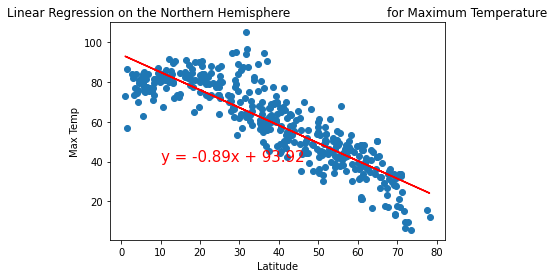

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

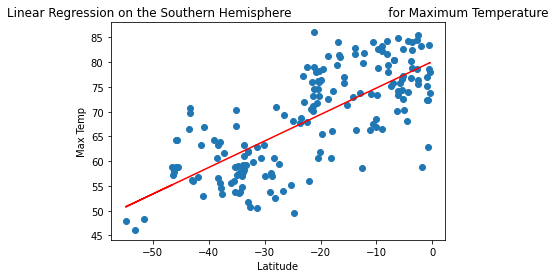

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

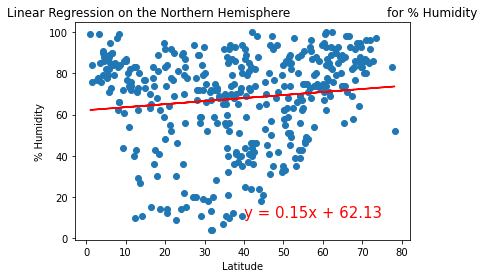

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

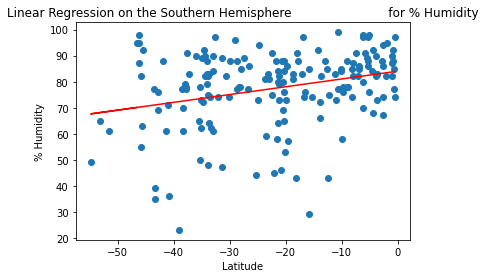

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

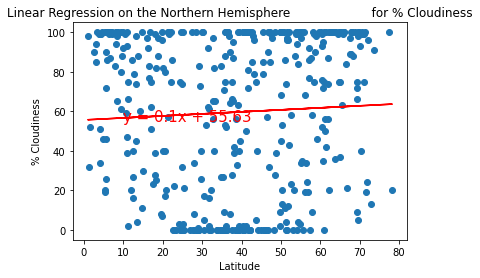

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

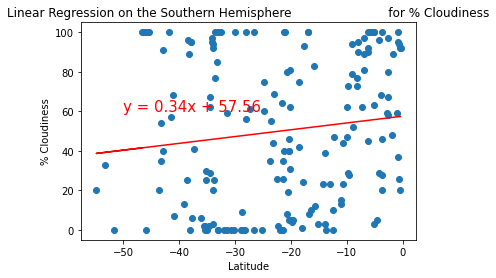

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

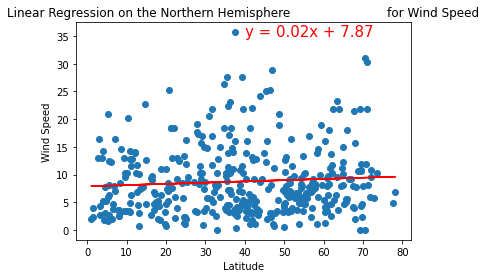

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

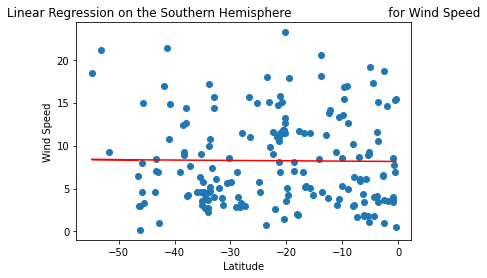

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))